In [1]:
#importing required libraries
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Nitin\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as style
import pandas_datareader.data as web

C:\Users\Nitin\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
import time
today = time.strftime("%Y,%m,%d")

In [4]:
today

'2020,11,17'

In [5]:
y=int(today.split(",")[0])
m=int(today.split(',')[1])
d=int(today.split(',')[2])

In [6]:
start=dt.datetime(2014,1,1)
end=dt.datetime(y,m,d)

In [7]:
comp=['YESBANK.BO','ASHOKLEY.NS','ICICIBANK.NS','BHARTIARTL.NS','TATAPOWER.NS','RPOWER.NS','HATHWAY.NS']

# Training Our Model


Epoch 1/1
 - 131s - loss: 0.0028
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 128s - loss: 0.0022
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 114s - loss: 0.0025
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 120s - loss: 0.0024
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 106s - loss: 0.0030
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 102s - loss: 0.0022
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Epoch 1/1
 - 97s - loss: 0.0029
Saved model to disk


C:\Users\Nitin\anaconda3\lib\site-packages\ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


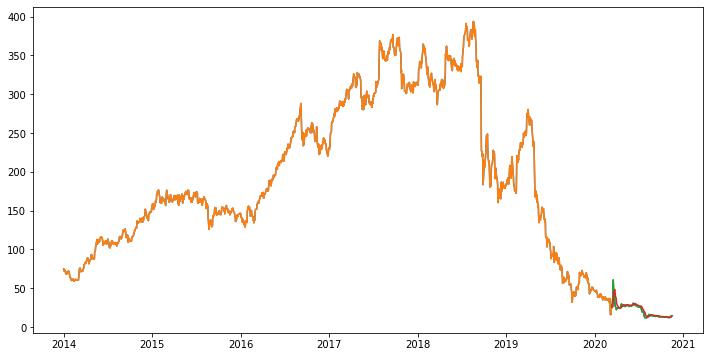

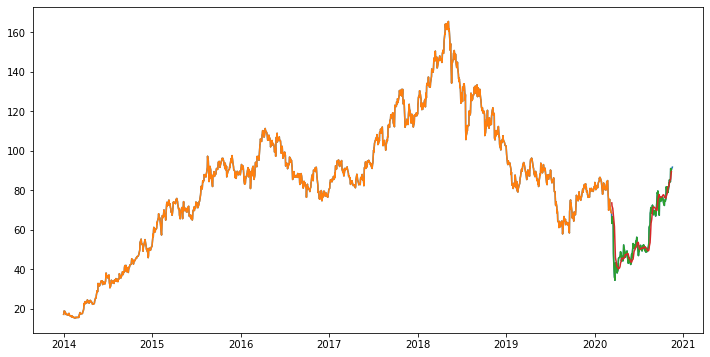

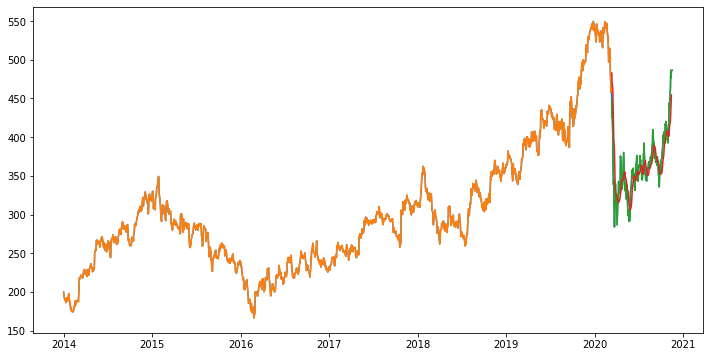

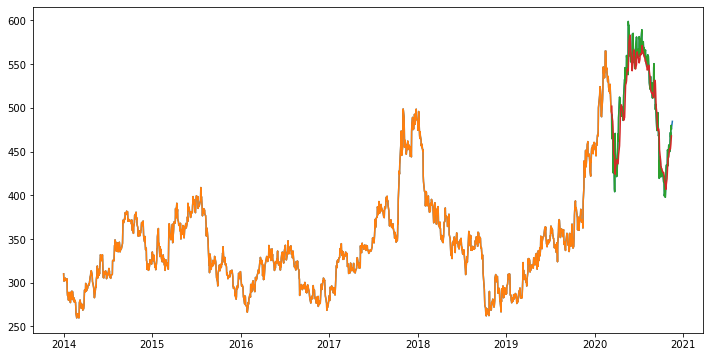

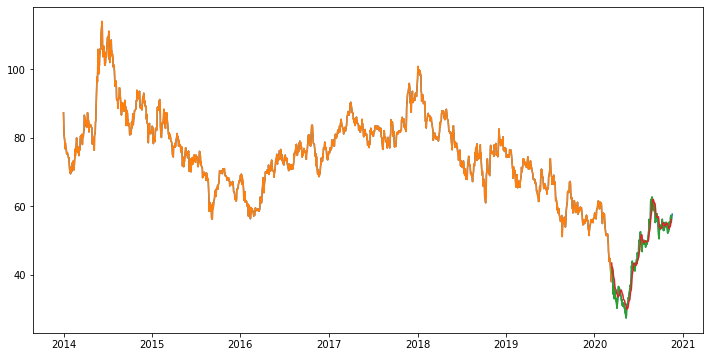

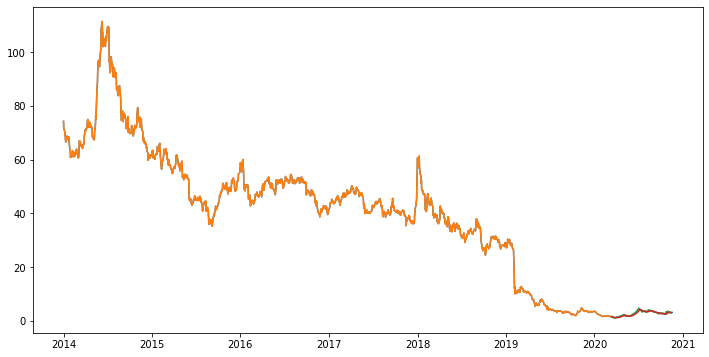

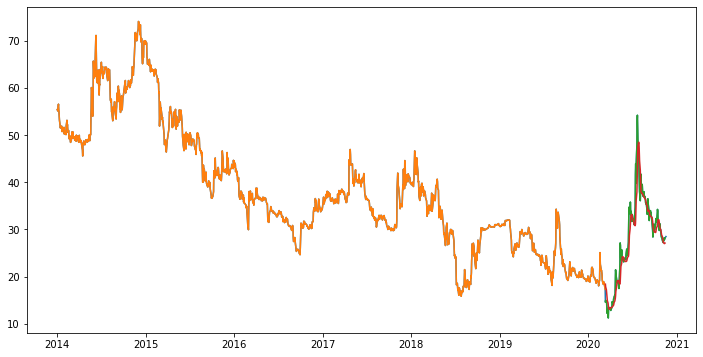

In [8]:
res=[]
fin=[]
for c in comp:
    df=web.DataReader(c,'yahoo',start,end)
    df['Date']=df.index
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']
    plt.figure(figsize=(12,6))
    plt.plot(df['Close'], label='Close Price history')
    df = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)-1),columns=['Date', 'Close'])
    for i in range(0,len(df['Date'])):
        new_data['Date'][i] = df['Date'][i]
        new_data['Close'][i] = df['Close'][i]
    date=[]
    for i in range(len(new_data)):
        date.append(str(new_data['Date'][i]))
    y=[]
    m=[]
    d=[]
    for i in range(len(new_data)):
        y.append(str(new_data['Date'][i]).split("-")[0])
        m.append(str(new_data['Date'][i]).split("-")[1])
        d.append(str(new_data['Date'][i]).split("-")[2])
    da=[]
    for i in range(len(new_data)):
        da.append(str(d[i]).split(' ')[0])
    new_data['Year']=y
    new_data['Mon']=y
    new_data['Day']=da
    #setting index
    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values
    l=new_data.shape[0]
    train = dataset[0:9*(l//10),:]
    valid = dataset[9*(l//10):,:]

    #converting dataset into x_train and y_train
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)
    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    # create and fit the LSTM network
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)
    model_json = model.to_json()
    st='model_'+c+'.json'
    with open(st, "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    wt='model_'+c+'h5'
    model.save_weights(wt)
    print("Saved model to disk")
    model.save_weights(wt)
    #predicting 60 values, using past 60 from the train data
    inputs = new_data[len(new_data) - len(valid) - 60:]['Close'].values
    inputs = inputs.reshape(-1,1)
    inputs = scaler.fit_transform(inputs)
    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price=scaler.inverse_transform(closing_price)
    cp=np.squeeze(closing_price).shape
    su=0
    for i in range(len(closing_price)):
        su=su+closing_price[i]
    avg=su/len(closing_price)
    res.append(avg[0]/new_data['Close'][9*(l//10)])
    #for plotting
    train = new_data[0:9*(l//10)]
    valid = new_data[9*(l//10):l]
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])